# Car Price Prediction 

In [11]:
# For importing neccessary libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Loading the .csv file:-
data=pd.read_csv("usedcars.csv")

In [13]:
# Fetching the data rows and columns:
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


# EXPLORATORY DATA ANALYSIS (EDA):-

In [14]:
# For checking how many rows and columns are there in dataset.
data.shape

(1234, 13)

Here, there are 1234 rows and 13 columns present in dataset.

In [15]:
# For checking the available columns in the dataset.
data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

Here, we have observed that Column named: Unnamed: 0 is having index numbers of rows,
However, index numbers are already showing in the dataset, so we will drop this column to avoid duplications of data.

In [16]:
# For dropping the not required column:-
data=data.drop(['Unnamed: 0'], axis=1)

In [17]:
# For checking whether above column has been removed or not:-
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [18]:
# For checking the Null values in the dataset:-
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [19]:
# For checking the datatypes of each columns:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

Here, our Target column New_Price has object dtype, so this is a Classification Problem.

In [20]:
# For checking the information of the dataset:-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [21]:
# For checking the unique values in the dataset:
data.nunique()

Name                 768
Location              11
Year                  20
Kilometers_Driven    755
Fuel_Type              4
Transmission           2
Owner_Type             4
Mileage              301
Engine               104
Power                249
Seats                  7
New_Price            162
dtype: int64

In [15]:
# For checking the value counts of each column to see if there are any unrequired data in all the remaining columns of the dataset:-
for i in data.columns:
    print(data[i].value_counts())
    print('-----------')

Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Volkswagen Polo 1.2 MPI Highline                        8
Maruti Swift Dzire VDI                                  8
Audi A6 2011-2015 2.0 TDI Premium Plus                  7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE                          1
Hyundai Verna CRDi 1.6 SX Option                        1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde    1
Name: Name, Length: 768, dtype: int64
-----------
Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: Location, dtype: int64
-----------
2015    185
2016    145
2013    142
2014    128
2017    122
2011    113
2

In [16]:
# For filling null values in all categorical columns:-
value=data.columns.values
for i in range(0,len(value)):
    if data[value[i]].dtype=='object':
        data[value[i]].fillna(data[value[i]].mode()[0],inplace=True)

In [18]:
# For replacing all 0 values with mean of that column in all integer columns:-
for i in range(0,len(value)):
    if data[value[i]].dtypes!='object':
        data[value[i]].fillna(data[value[i]].mean(),inplace=True)

In [19]:
# For checking that the null values has been removed:-
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

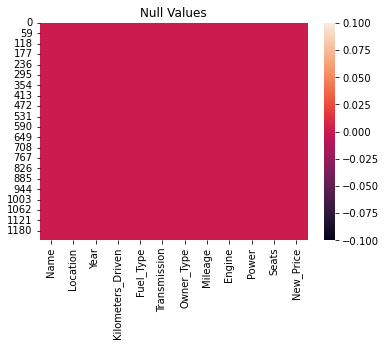

In [21]:
# For visualising presence of null values using heatmap:-
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

In [22]:
# For checking the statistical summary of the dataset:-
data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.821931
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


Here, as seen above there is a huge difference between mean and median so this means this is a right skewed data.

Also, there is a presence of outliers also as there is a gap between 75 % and Max values.
so it will be rectified in further processes.

# Performing Univariate Analysis:-

In [23]:
# For distributing our data into two variables i.e.category and integer:-
Category=[]
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        Category.append(i)
print(Category)

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']


In [24]:
# For distributing our data into two variables i.e.category and integer:-
Integer=[]
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        Integer.append(i)
print(Integer)

['Year', 'Kilometers_Driven', 'Seats']


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


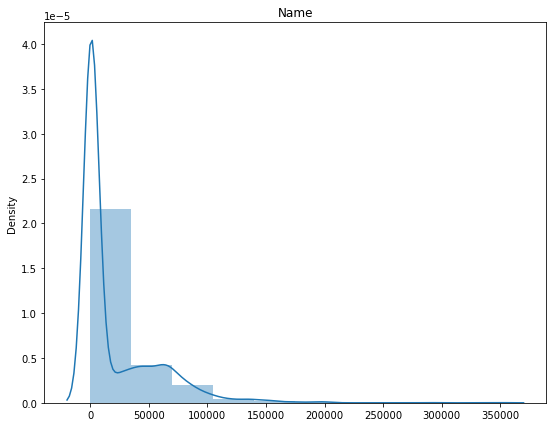

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


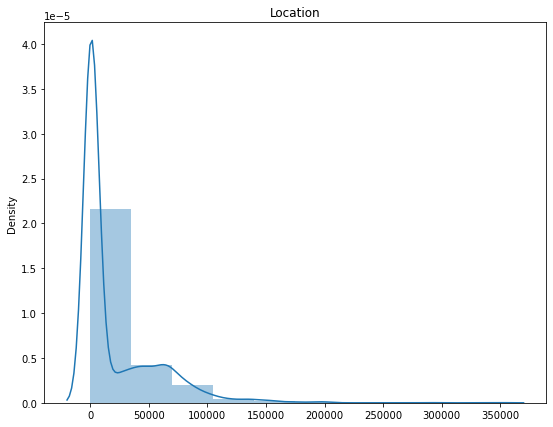

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


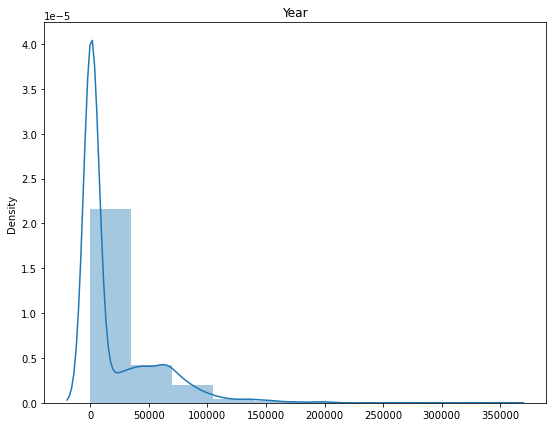

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


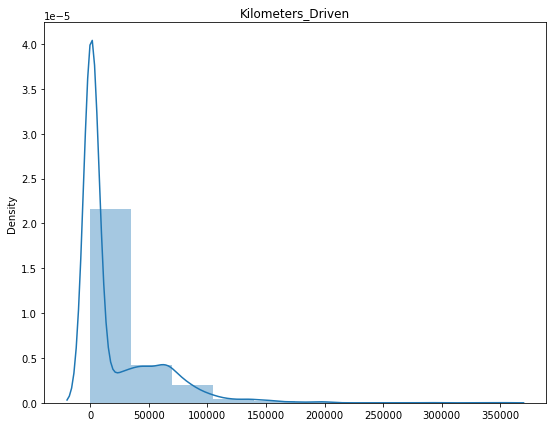

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


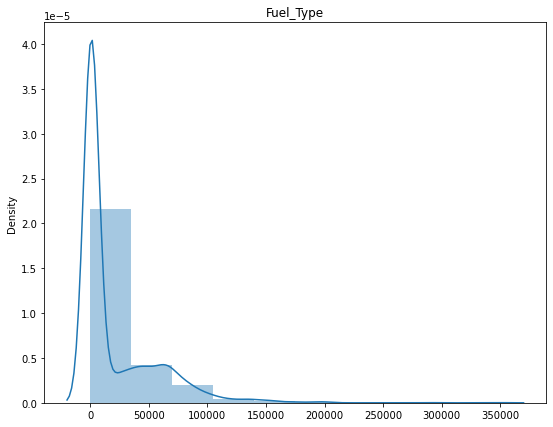

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


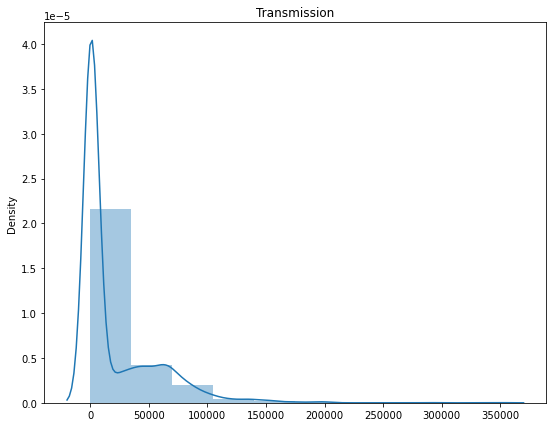

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


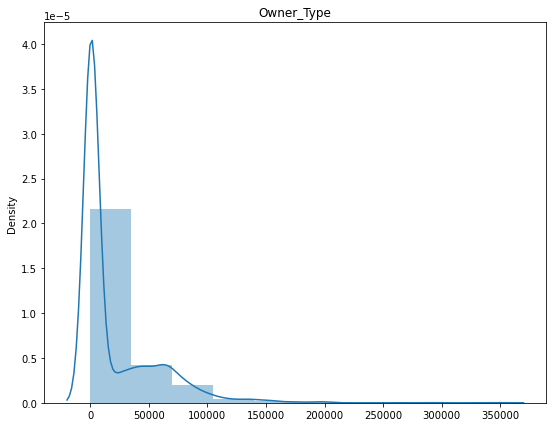

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


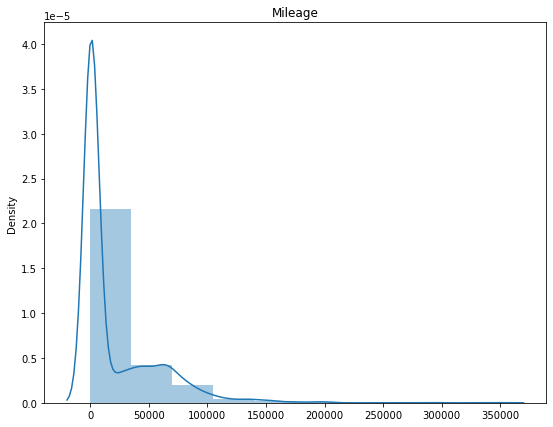

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


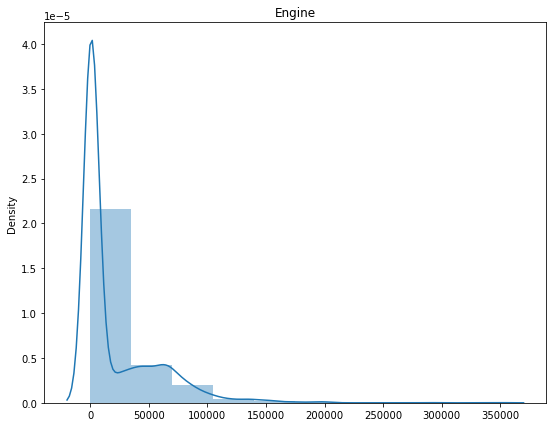

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


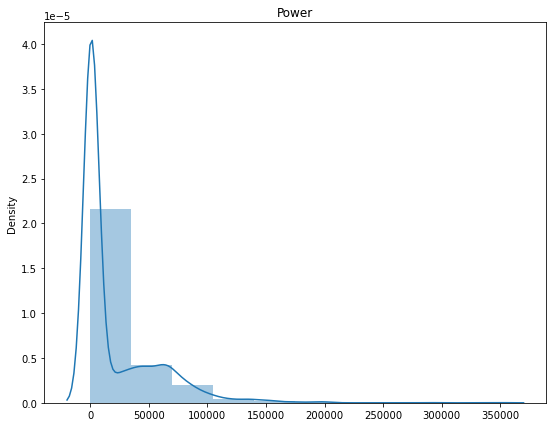

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


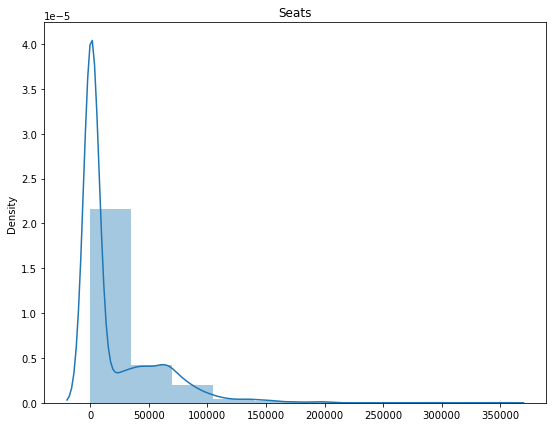

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


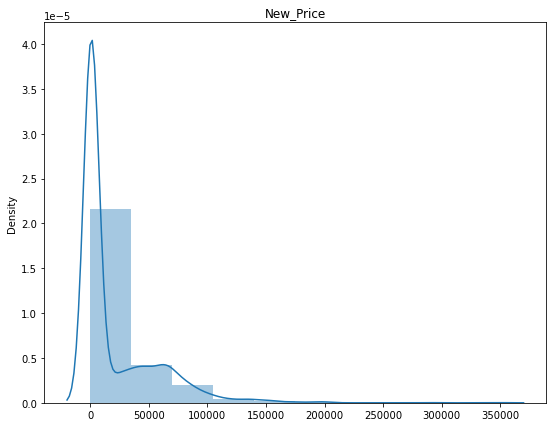

In [26]:
# For visualising all numerical columns in the dataset using dist plot:-
for i in data.columns:
    plt.figure(figsize=(9,7))
    sns.distplot(data[Integer],bins=10)
    plt.title(i)
    plt.show()

Here, the skewness is present in almost all columns, so we will remove this.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


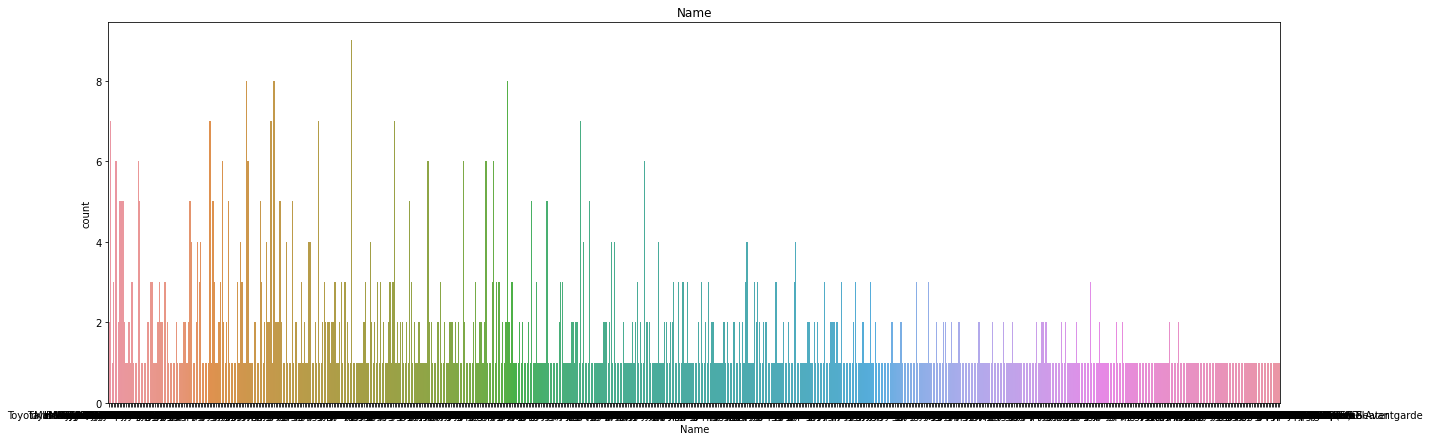

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


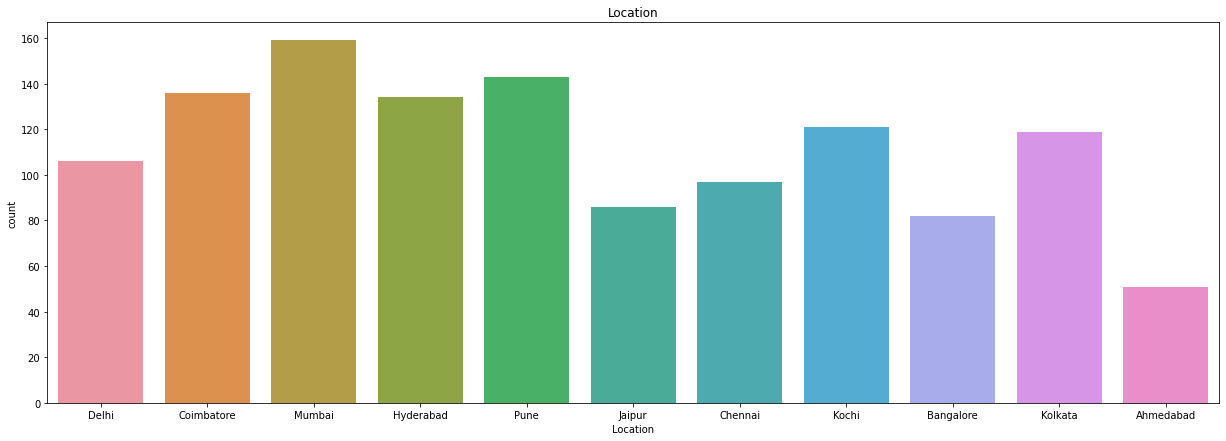

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


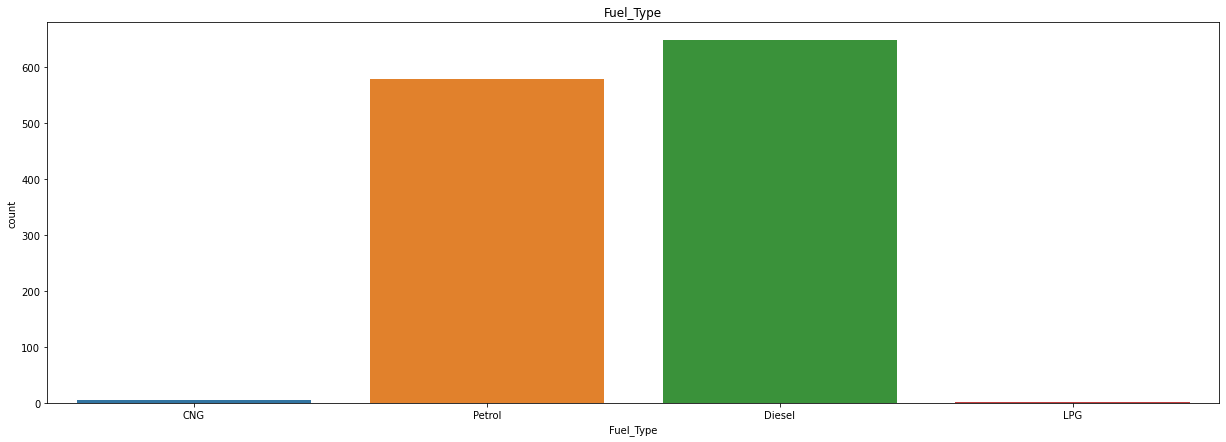

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


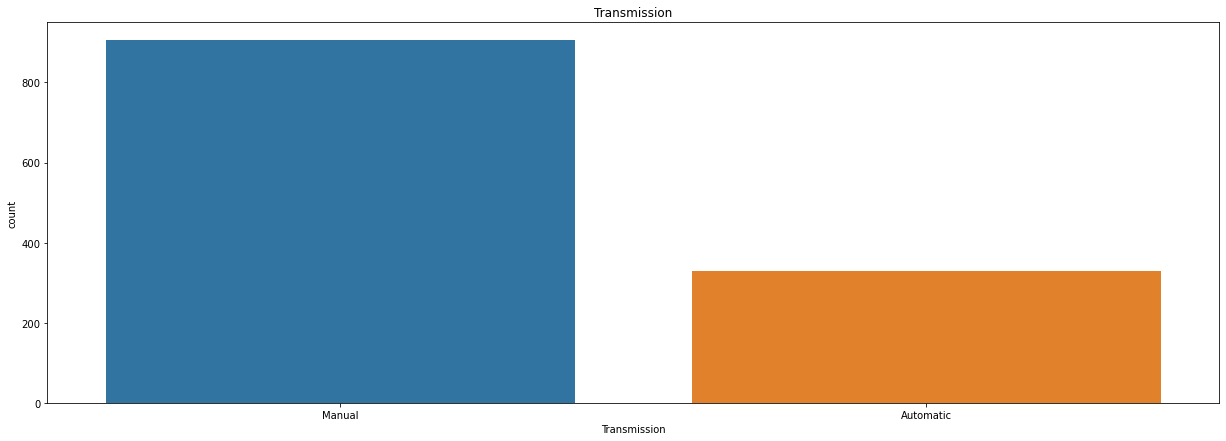

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


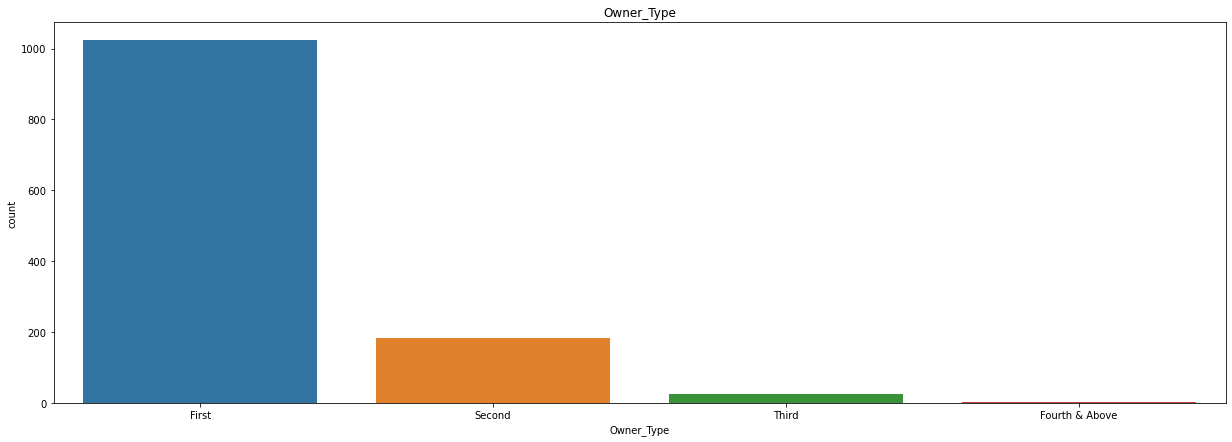

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


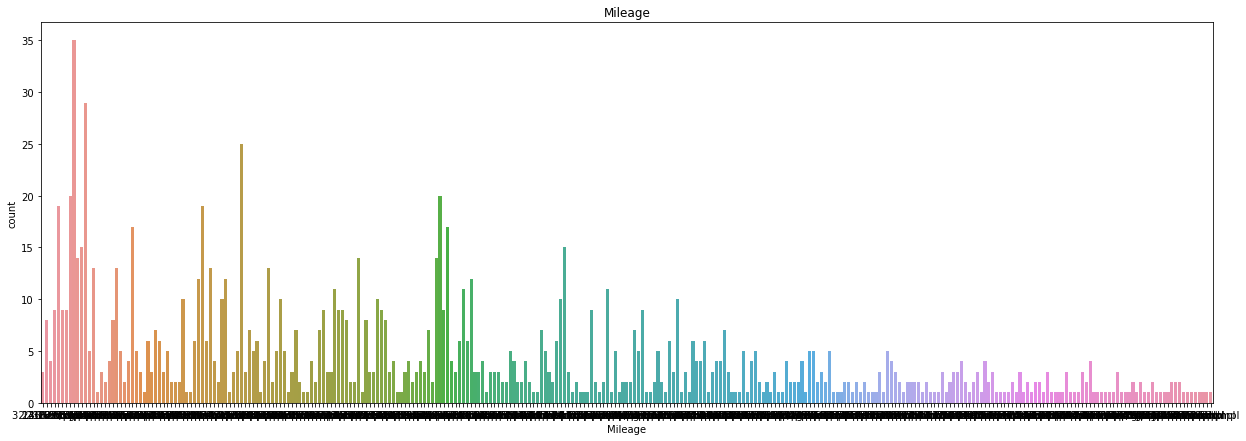

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


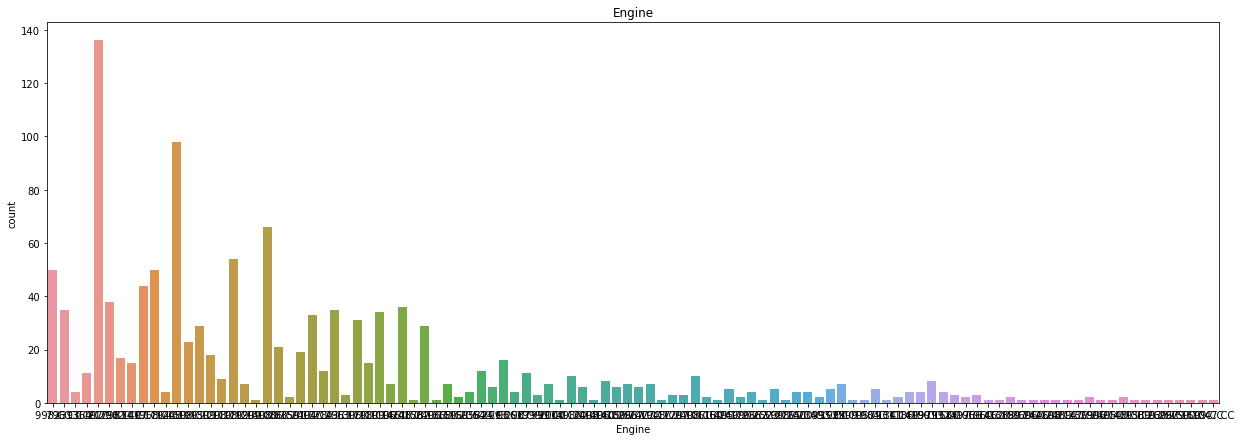

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


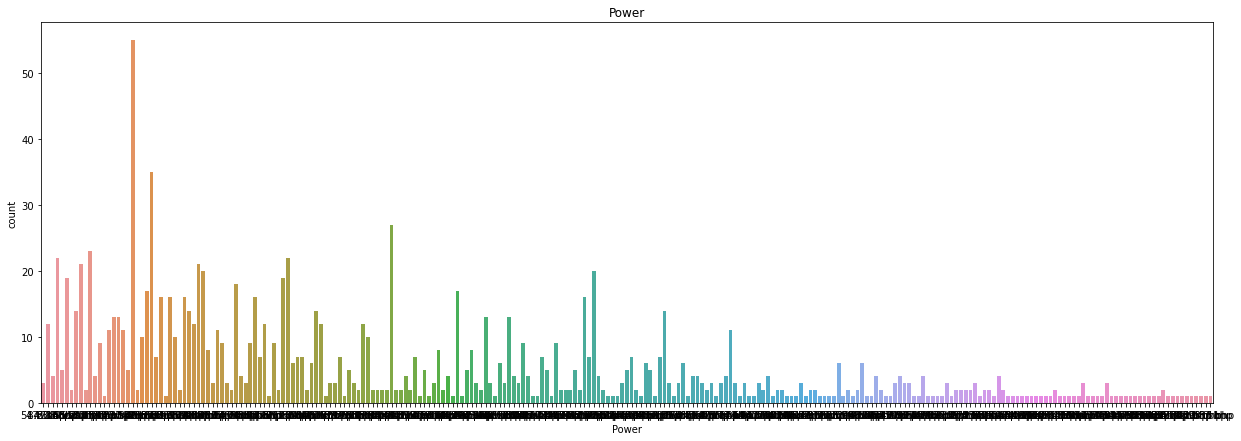

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


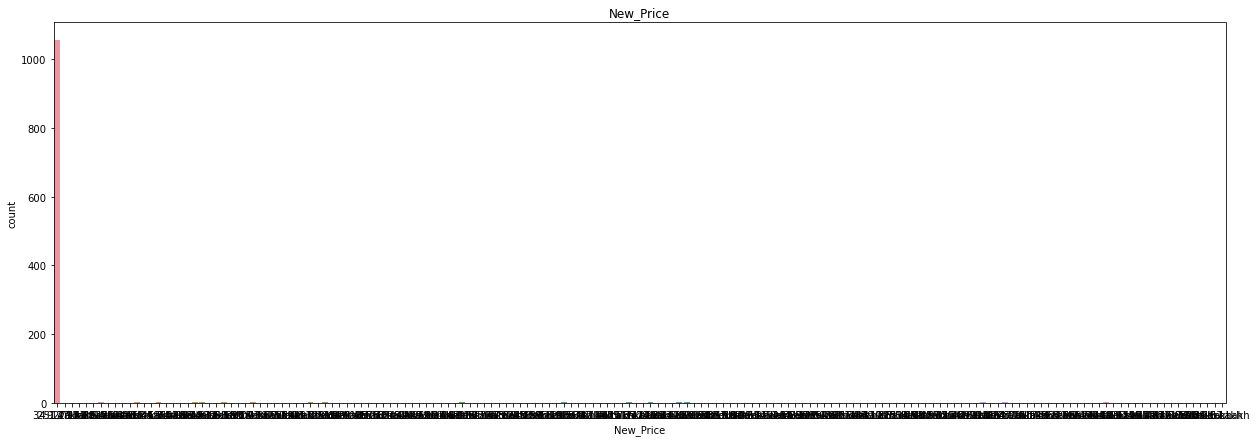

In [30]:
# For visualizing and checking columns in category using countplot:-

for i in data[Category]:
    plt.figure(figsize=(21,7))
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

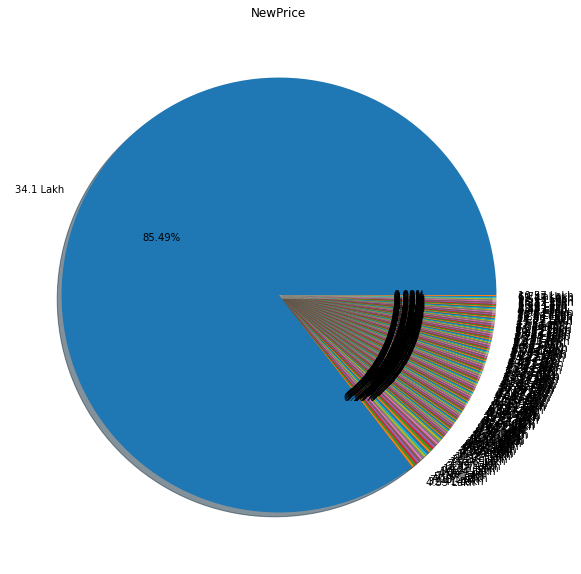

In [33]:
# For visualising Target columns in the dataset using pie plot:-
plt.figure(figsize=(15,10))
plt.pie(data['New_Price'].value_counts(), labels=data['New_Price'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.axis=('equal')
plt.title('NewPrice')
plt.show()

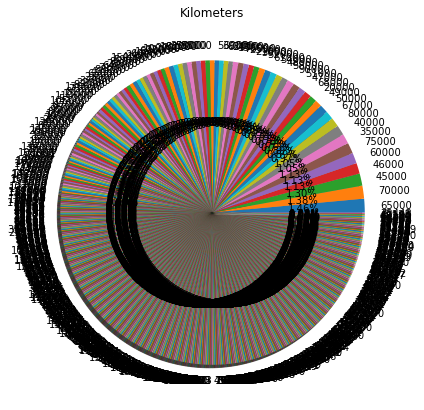

In [34]:
# For visualising different columns in the dataset using pie plot:-
plt.figure(figsize=(9,7))
plt.pie(data['Kilometers_Driven'].value_counts(), labels=data['Kilometers_Driven'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.axis=('equal')
plt.title('Kilometers')
plt.show()

# Bivariate Analysis:-

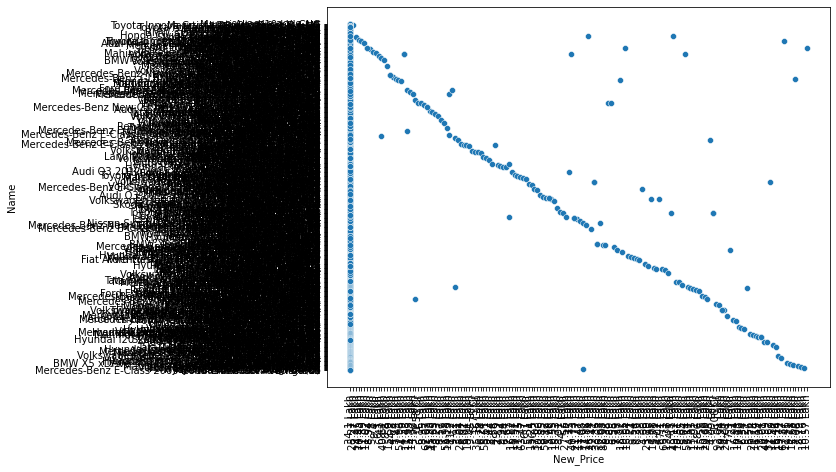

In [40]:
# lets check the correlation of New_Price with Name using scatter plot:-
plt.figure(figsize=(9,7))
sns.scatterplot(x='New_Price',y='Name',data=data)
plt.xticks(rotation=90)
plt.show()

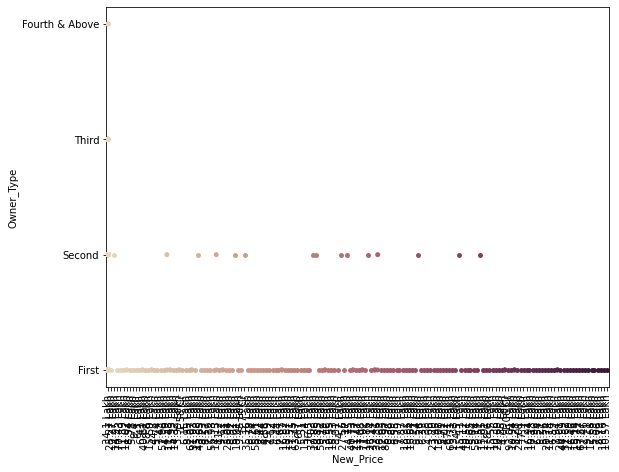

In [42]:
# For checking correlation of New_Price with Owner_Type column using strip plot method:-
plt.figure(figsize=(9,7))
sns.stripplot(x='New_Price',y='Owner_Type',data=data, palette='ch:.28')
plt.xticks(rotation=90)
plt.show()

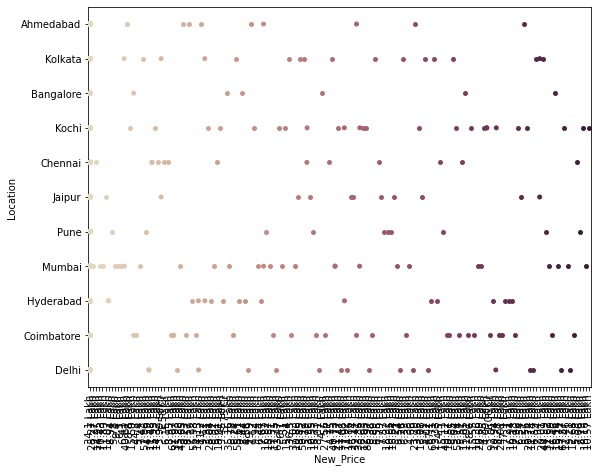

In [44]:
# For checking correlation of New_price with Location column:-
plt.figure(figsize=(9,7))
sns.stripplot(x='New_Price',y='Location',data=data, palette='ch:.28')
plt.xticks(rotation=90)
plt.show()

Here, as seen 2 cities are showing maximum prices for cars to be sold.

# Multi Variate Analysis:-

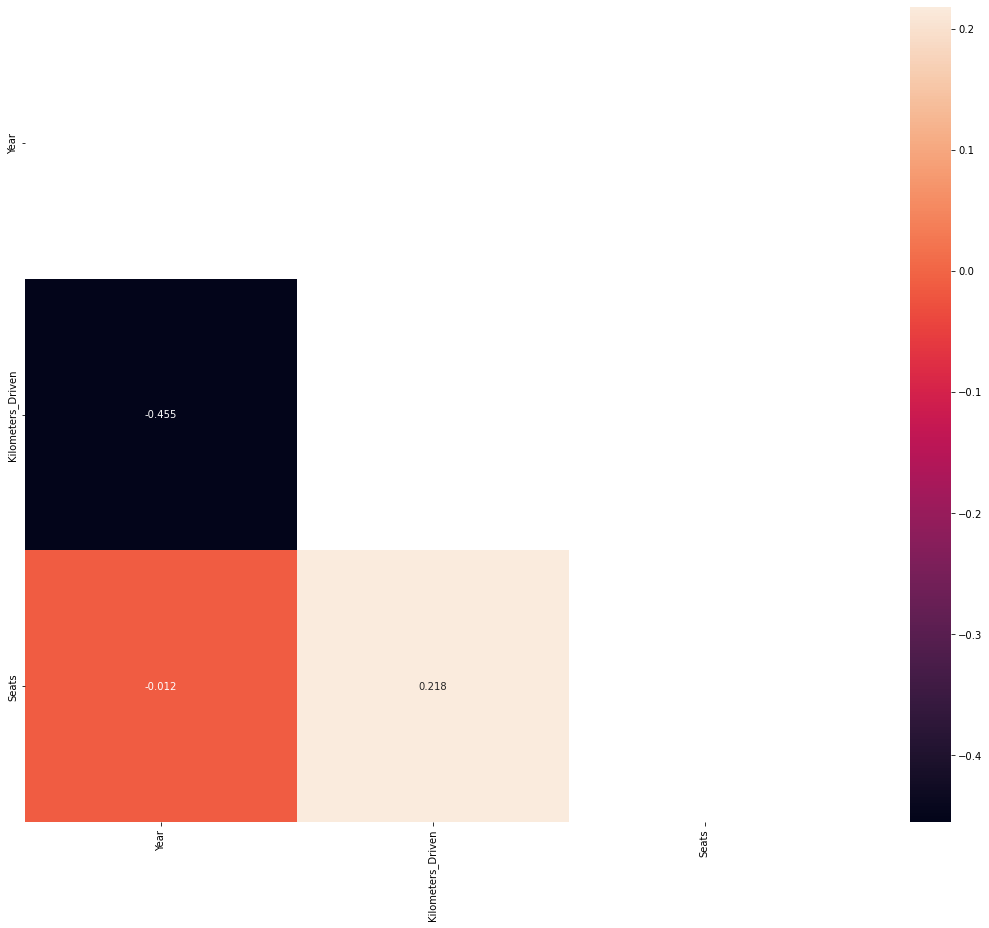

In [45]:
# For visualising correlation of all the feature columns with target column:- 
tri= np.triu(data.corr())
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, square=True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

Here as seen KilometersDriven column is very highely correlated with other columns in the dataset.

Also, column Seats shares a very little relation with other columns in the dataset.

# Removal of Outliers:-

<AxesSubplot:>

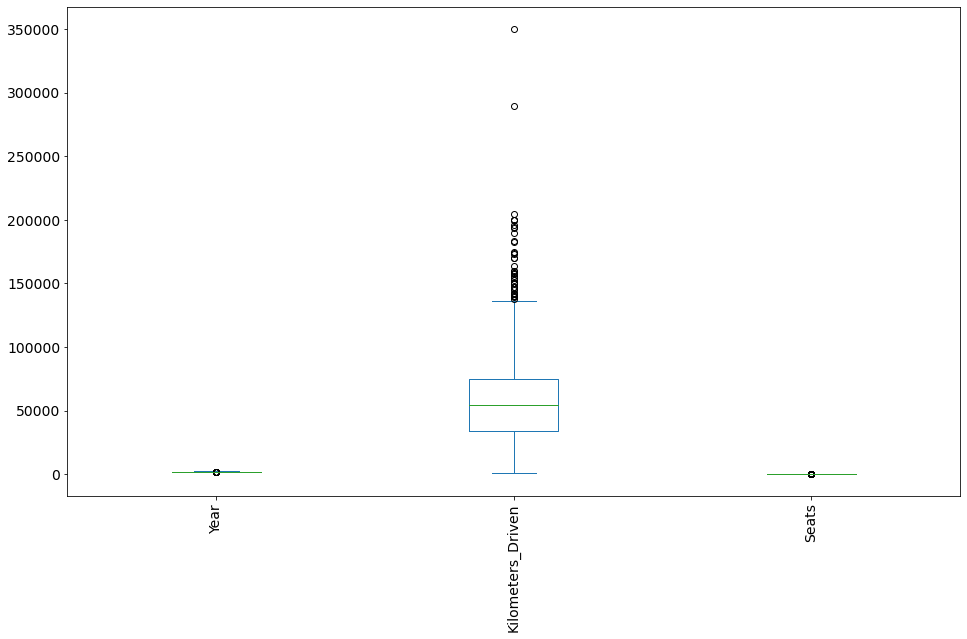

In [47]:
# For checking the presence of outliers in numerical columns using box plot method:-
data.plot(rot = 90,kind='box',fontsize=14,figsize=(16,9))

Here, as seen above outliers are present mostly in KilometersDriven column, so this should be removed.

In [23]:
# lets make a list of all features except day and month to remove outliers.
outliers=data[['Kilometers_Driven']]

In [24]:
# For removing outliers using ZScore Method and importing required libraries for ZScore:-
from scipy.stats import zscore
z=np.abs(zscore(outliers))
z

,Kilometers_Driven
0,0.493990
1,0.112811
2,0.688711
3,2.262030
4,0.829223
...,...
1229,0.868465
1230,0.013846
1231,0.857325
1232,0.175507


Here, as shown above the outliers has been removed properly.

In [25]:
# For checking the new dataframe after removal:-
data1=data[(z<3).all(axis=1)]
data1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


Now, we have left with 1217 rows and 12 columns in the new dataset after outliers removal.

In [53]:
# For checking the shape again:-
data1.shape

(1217, 12)

# Checking Skewness:-

In [54]:
# lets check for skewness in the dataframe:-
data1.skew()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_14320\3517742443.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


Year                -0.811600
Kilometers_Driven    0.774422
Seats                2.192913
dtype: float64

Here, the skewness is present in almost all columns.

In [55]:
# For making list of columns with skewness and importing required libraries for removal using yeo-johnson method:-
skew=['Year','Kilometers_Driven','Seats']

In [56]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box-cox' or 'yeo-johnson'\n"

In [57]:
data1[skew]=scaler.fit_transform(data1[skew].values)
data1[skew]

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_14320\342891737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[skew]=scaler.fit_transform(data1[skew].values)


,Year,Kilometers_Driven,Seats
0,0.153322,-0.391079,-2.247092
1,-0.170520,0.071687,-0.282672
2,1.170426,-0.655393,2.068212
3,-0.487044,2.188178,-0.282672
4,0.153322,-0.862167,-0.282672
...,...,...,...
1229,-0.796412,1.059400,-0.282672
1230,0.484647,0.213180,-0.282672
1231,-0.487044,-0.905472,-0.282672
1232,-0.170520,-0.000376,-0.282672


In [58]:
# For checking the skewness again:-
data1.skew()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_14320\3068767257.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


Year                -0.574574
Kilometers_Driven   -0.018025
Seats               -0.635676
dtype: float64

So, now the skewness has been removed from almost all columns.

# Encoding Techniques:-

In [29]:
# For separating categorical column in new dataset:-
Category1=[]
for i in data1.dtypes.index:
    if data1.dtypes[i]=='object':
        Category1.append(i)
print(Category1)

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']


In [30]:
# For importing required libraries for encoding:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1[Category1]=data1[Category1].apply(le.fit_transform)
data1[Category1].head()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22116\4167336439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[Category1]=data1[Category1].apply(le.fit_transform)


,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
0,410,4,0,1,0,292,101,161,162
1,405,3,3,1,2,271,96,152,162
2,718,9,1,1,0,52,66,63,54
3,684,5,1,1,0,259,16,246,162
4,331,9,3,1,0,165,9,209,162


Here, all the categorical columns has been converted to numerical data for proceeding further.

# Scaling of data:-

In [26]:
# For separating Target column and features column:-
x=data1.drop('New_Price',axis=1)
y=data1['New_Price']

In [62]:
# For Importing all required libraries for standard scaler:-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [63]:
# For fetching first 5 rows of features:-
x.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0.151081,-0.530918,0.153322,-0.391079,-1.938116,0.608683,-0.444154,1.714846,2.020917,0.298186,-2.247092
1,0.128062,-0.860912,-0.170520,0.071687,1.046305,0.608683,2.052544,1.452924,1.855074,0.181542,-0.282672
2,1.569042,1.119050,1.170426,-0.655393,-0.943309,0.608683,-0.444154,-1.278546,0.860014,-0.971937,2.068212
3,1.412514,-0.200925,-0.487044,2.188178,-0.943309,0.608683,-0.444154,1.303255,-0.798419,1.399823,-0.282672
4,-0.212617,1.119050,0.153322,-0.862167,1.046305,0.608683,-0.444154,0.130843,-1.030600,0.920287,-0.282672


So, Here the data has been scaled properly.

# Checking Multicollinearity:-

In [64]:
# For checking multicolinearity issue using VIF and importing all required libraries:-
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.060828,Name
1,1.029954,Location
2,1.930546,Year
3,1.692501,Kilometers_Driven
4,1.390022,Fuel_Type
5,1.430852,Transmission
6,1.186069,Owner_Type
7,1.855608,Mileage
8,1.225134,Engine
9,1.497330,Power


Here, the doubt of multicollinearity as rectified and as seen above,
all values are under limit.Multicollinearity is not present here.

# Data Balancing:-

In [65]:
# For checking the value_counts of our Target column label:-
y.value_counts()

67     1038
77        2
64        2
124       2
82        2
       ... 
158       1
16        1
119       1
116       1
6         1
Name: New_Price, Length: 162, dtype: int64

In [ ]:
# For importing all required libraries for data balancing using SMOTE:-
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

# Finding the Best Random State:-

In [7]:
# For importing all required libraries:- 
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [72]:
# For finding the Best Random State and accuracy score:-
Max_acc=0
Max_rs=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27, random_state=i)
    Model=RandomForestClassifier()
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>Max_acc:
        Max_acc=acc
        Mar_rs=i
        
print("Best Accuracy is ", Max_acc, "on random_state ",Max_rs)

Best Accuracy is  0.9027355623100304 on random_state  0


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=0)

# Classification Problem:-

In [4]:
# For importing all required libraries for model selection:-
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import ExtraTreesClassifier

In [75]:
# For checking accuracy score with 1st Algorithm:- KNeighborsClassifier:-
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,predknn))
print("Confusion Matrix: ",confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

Accuracy Score:  0.878419452887538
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          49   

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\si

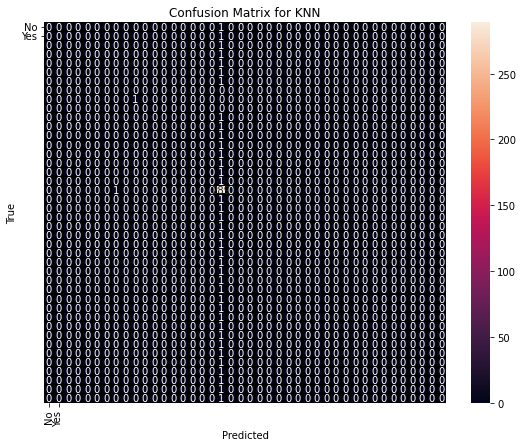

In [76]:
# For checking confusion Matrix of above model:-
CM=confusion_matrix(y_test,predknn)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(CM, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

In [81]:
# For checking with 2nd algorithm:- ExtraTrees Classifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,predETC))
print("Confusion Matrix: ",confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

Accuracy Score:  0.878419452887538
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         1
          51   

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\si

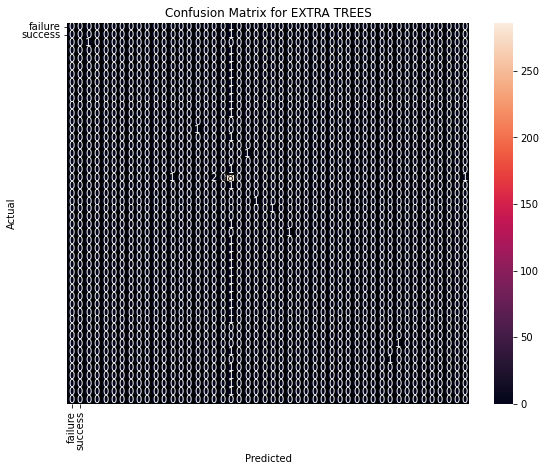

In [83]:
# For checking Confusion Matrix:-
CM1=confusion_matrix(y_test,predETC)
x_axis_labels=['failure','success']
y_axis_labels=['failure','success']
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(CM1, annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title('Confusion Matrix for EXTRA TREES')
plt.show()

In [84]:
# For checking accuracy score with 3rd algorithm:-
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_d=DTC.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_d))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_d))
print(classification_report(y_test,pred_d))

Accuracy Score:  0.790273556231003
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34   

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\si

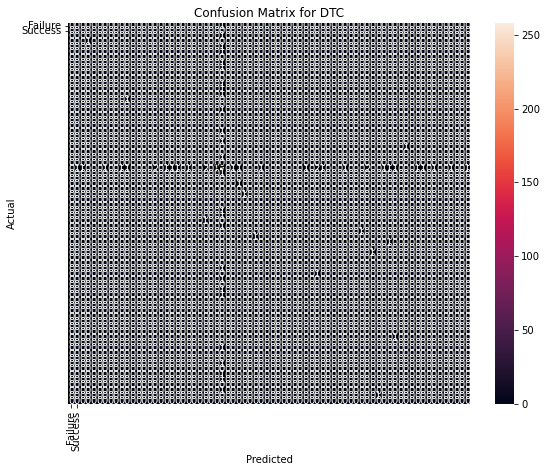

In [85]:
# For checking Confusion Matrix:-
CM2=confusion_matrix(y_test,pred_d)
x_axis_labels=['Failure','Success']
y_axis_labels=['Failure','Success']
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(CM2,annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DTC')
plt.show()

In [86]:
# For checking accuracy score with 4th algorithm:-
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_g=gbc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,pred_g))
print('Confusion Matrix: ',confusion_matrix(y_test,pred_g))
print(classification_report(y_test,pred_g))

Accuracy Score:  0.8024316109422492
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          31  

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\si

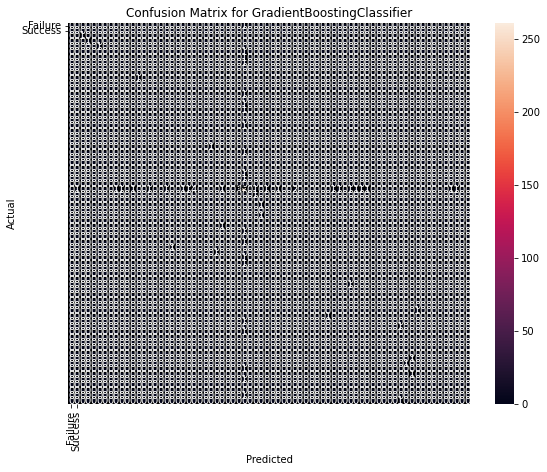

In [87]:
# For checking Confusion Matrix:-
CM3=confusion_matrix(y_test,pred_g)
y_axis_labels=['Failure','Success']
x_axis_labels=["Failure","Success"]
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(CM3,annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()

In [88]:
# For checking accuracy score with 5th algorithm:-
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_r=rfc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_r))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_r))
print(classification_report(y_test,pred_r))

Accuracy Score:  0.878419452887538
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55   

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\si

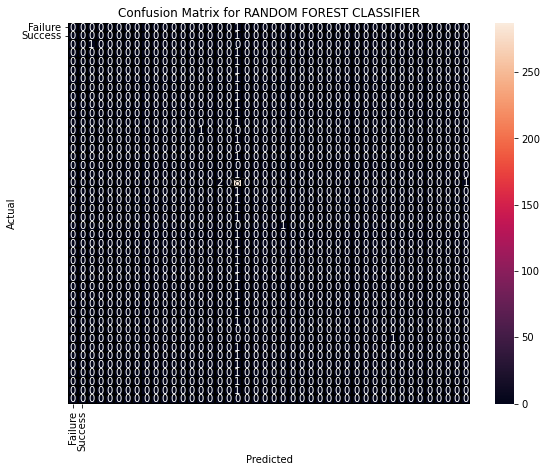

In [89]:
# For checking Confusion Matrix:-
CM4=confusion_matrix(y_test,pred_r)
x_axis_labels=['Failure','Success']
y_axis_labels=['Failure','Success']
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(CM4,annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RANDOM FOREST CLASSIFIER')
plt.show()

# Cross Validation Phase:-

In [90]:
# For checking Cross Validation scores of all the models and importing all required libraries:-
from sklearn.model_selection import cross_val_score

In [91]:
#  For checking CV score of KNN:-
print(cross_val_score(knn,x,y,cv=5).mean())

0.8446974296701073


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [92]:
#  For checking CV score of Extra Trees:-
print(cross_val_score(ETC,x,y,cv=5).mean())

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.8520980908048303


In [93]:
#  For checking CV score of DecisionTree:-
print(cross_val_score(DTC,x,y,cv=5).mean())

0.760912096066923


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [94]:
#  For checking CV score of RandomForest:-
print(cross_val_score(rfc,x,y,cv=5).mean())

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.8537441813398097


In [95]:
#  For checking CV score of GradientBoost:-
print(cross_val_score(gbc,x,y,cv=5).mean())

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.7666363084395871


So,Here the Best Accuracy score is coming 87.8 %  of Extra Trees Classifier and 
also with least difference between Cv score and accuracy score, 
So this is the Best and Final Model for proceeding to Hyper parameter tuning.

# Hyper Parameter Tuning:-

In [96]:
# For importing all required libraries for hyper parameter tuning:-
from sklearn.model_selection import GridSearchCV

In [97]:
parameters={'criterion':['gini', 'entropy'],
           'n_estimators':[100,200,300],
           'max_features':['sqrt'],
           }

In [98]:
gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [99]:
FinalModel=ExtraTreesClassifier(criterion='gini',n_estimators=100 ,max_features='sqrt')
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',(accuracy_score(y_test,pred)*100))
print('Confusion Matrix: ',confusion_matrix(y_test,pred))

Accuracy Score:  88.14589665653494
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


So, Here the accuracy score has been increased to 88.1 % which is still good after Hyper parameter tuning.

# ROC/ AUC CURVE:-

In [ ]:
# For importing required libraries
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(ETC, x_test, y_test, ax=disp.ax_)     
plot_roc_curve(gbc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':9}, loc='lower right')
plt.show()

# Saving the Model:-

In [110]:
# For importing required libraries:-
import pickle
Name='CarPricePrediction'
pickle.dump(FinalModel,open(Name,'wb'))

# Loading Model for Predictions:-

In [113]:
# loading the saved model:-
LoadModel=pickle.load(open('CarPricePrediction','rb'))
Result=LoadModel.predict(x_test)
print(Result)

[ 67  67  67  67  67  67  67  67  67  67 160  67  67  67  67  73  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  82  67  67  67  77  67
  67  67  67  10  67  67  67  67  67  67  67  67  67  67  67  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67
  67  67  67  67  67  67  67  67  62  67  67  67  67  67  67  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  55
  67 130  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  62  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  72  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  6

In [112]:
pd.DataFrame([LoadModel.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,319,320,321,322,323,324,325,326,327,328
Predicted,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
Actual,67,67,67,67,67,67,67,67,67,67,...,26,67,67,67,67,67,67,67,67,67


Here, the Actual and Predicted values are same so it means model is built accurately.

Thanks